In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [11]:
# Load the dataset
df = pd.read_csv('Solar_radiation_classification.xls')

# Inspect the data
#print(data.head())
# Explore the dataset
print("First 5 rows:\n", df.head())





First 5 rows:
    Air Temperature (C°)  Air Temperature Uncertainty (C°)  \
0              1.598833                         -0.039841   
1              1.415552                         -0.039841   
2              1.034891                         -0.039841   
3              0.174880                         -0.039841   
4             -0.572343                         -0.039841   

   Wind Direction at 3m (°N)  Wind Direction at 3m Uncertainty (°N)  \
0                  -1.358521                               0.163933   
1                  -1.333544                               0.163933   
2                  -1.241959                               0.163933   
3                  -1.075441                               0.163933   
4                  -0.883946                               0.163933   

   Wind Speed at 3m (m/s)  Wind Speed at 3m Uncertainty (m/s)  \
0               -0.351941                            0.677977   
1               -0.460051                           -1.548603

In [12]:
# Feature selection: Select columns for clustering (Adjust if necessary)
# selected_features = df[['DHI (Wh/m2)', 'Relative Humidity (%)', 'GHI (Wh/m2)']]
selected_features1 = df[['DHI (Wh/m2)', 'GHI (Wh/m2)']]

In [13]:
# Standardize the features to normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features1)


In [15]:
# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

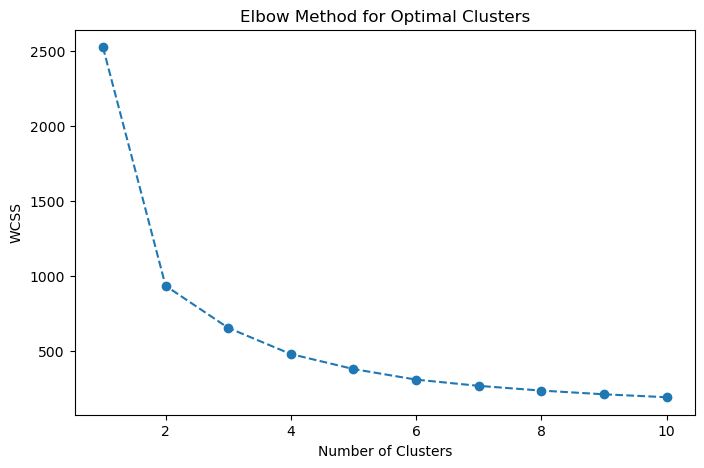

In [6]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
# Choose the optimal number of clusters (e.g., from Elbow plot) - say k=3
k =3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [8]:
# Add the cluster labels to the original DataFrame
#df['Cluster'] = clusters

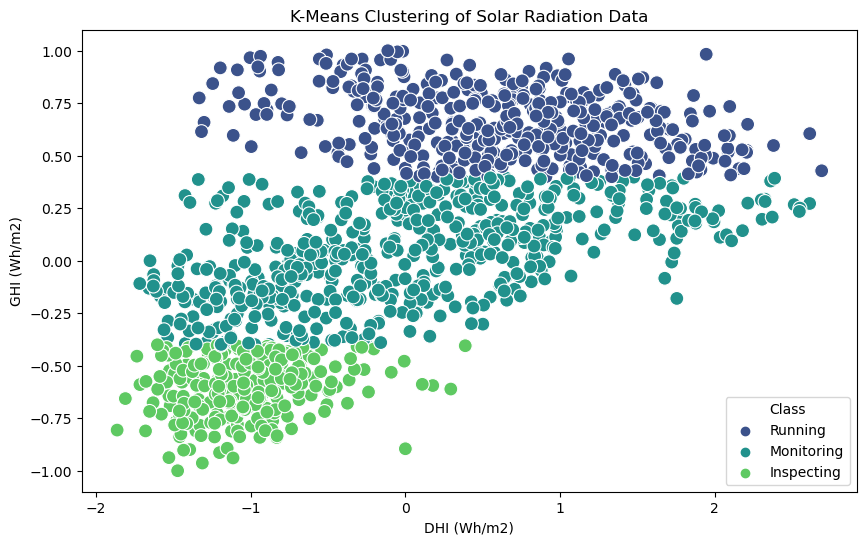

In [9]:
# Visualize the clusters (use scatterplot for two selected features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DHI (Wh/m2)', y='GHI (Wh/m2)', hue='Class', palette='viridis', s=100)
#sns.scatterplot(data=df, x='DHI (Wh/m2)', y='GHI (Wh/m2)',  palette='viridis', s=100)
plt.title('K-Means Clustering of Solar Radiation Data')
plt.show()
#df[['DHI (Wh/m2)', 'Relative Humidity (%)', 'GHI (Wh/m2)']]